## A simple Task for distributions of US Birth 

### Import Necessary Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("us_births_2016_2021.csv")
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


### Check NAN Values

In [2]:
df.isna()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5491,False,False,False,False,False,False,False,False,False
5492,False,False,False,False,False,False,False,False,False
5493,False,False,False,False,False,False,False,False,False
5494,False,False,False,False,False,False,False,False,False


#### Count the number of occurrences for each combination of State and Gender

In [3]:
count_df = df.groupby(['State', 'State Abbreviation', 'Year', 'Gender']).size().reset_index(name='Count')

#### Calculate the maximum count for each combination of State and Year

In [4]:
max_count_df = count_df.groupby(['State', 'State Abbreviation', 'Year'])['Count'].max().reset_index()

#### Filter the DataFrame to include only the rows with the maximum count

In [5]:
filtered_df = pd.merge(count_df, max_count_df, on=['State', 'State Abbreviation', 'Year', 'Count'])
filtered_df.drop('Count', axis=1, inplace=True)

#### Merge the filtered DataFrame with the original DataFrame to retrieve all the relevant columns

In [6]:
result_df = pd.merge(filtered_df, df, on=['State', 'State Abbreviation', 'Year', 'Gender'])

#### Visualize the data

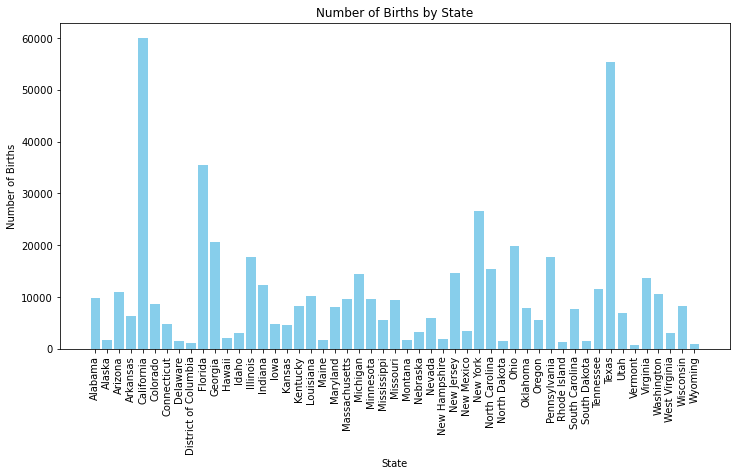

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(result_df['State'], result_df['Number of Births'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Births')
plt.title('Number of Births by State')
plt.xticks(rotation=90)
plt.show()

### We distribution the Education level for Mothers

In [8]:
inplace = True 
df.sort_values(by=['Education Level of Mother'], ascending=False, axis=0, inplace=True)
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
5495,Wyoming,WY,2021,M,Unknown or Not Stated,-9,41,29.2,3177.5
3839,Ohio,OH,2019,M,Unknown or Not Stated,-9,222,27.9,2986.4
3884,Oklahoma,OK,2016,F,Unknown or Not Stated,-9,63,27.1,3022.2
692,Connecticut,CT,2018,F,Unknown or Not Stated,-9,23,28.6,3147.1
3875,Ohio,OH,2021,M,Unknown or Not Stated,-9,223,29.3,3117.3


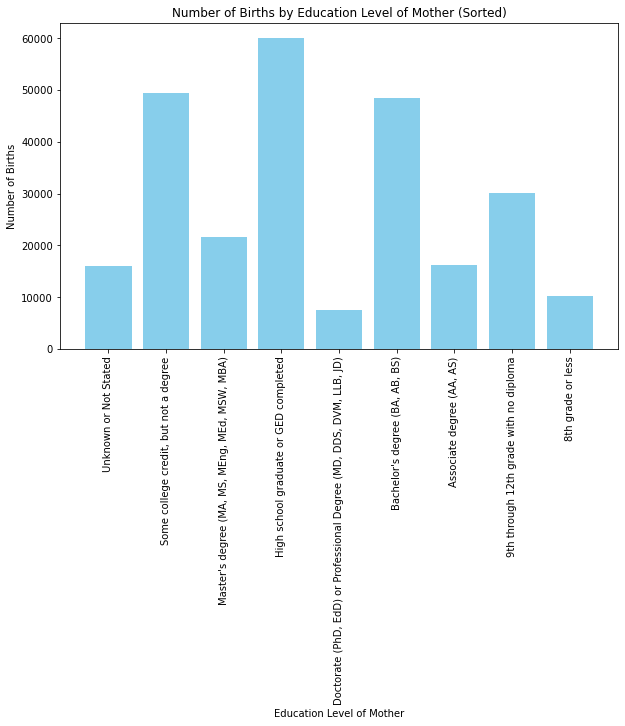

In [9]:
# Visualize the sorted DataFrame
plt.figure(figsize=(10, 6))
plt.bar(df['Education Level of Mother'], df['Number of Births'], color='skyblue')
plt.xlabel('Education Level of Mother')
plt.ylabel('Number of Births')
plt.title('Number of Births by Education Level of Mother (Sorted)')
plt.xticks(rotation=90)
plt.show()

## Now Comparing Gender per Year

#### Filter the dataset for only the desired columns

In [12]:
filtered_df = df[['Year', 'Gender', 'Number of Births']]

#### Group the data by year and gender and calculate the total number of births

In [ ]:
grouped_df = filtered_df.groupby(['Year', 'Gender']).sum().reset_index()

#### Pivot the table to have separate columns for male and female

In [14]:
pivot_df = grouped_df.pivot(index='Year', columns='Gender', values='Number of Births')

#### Plot the comparison using line plots

<AxesSubplot:xlabel='Year'>

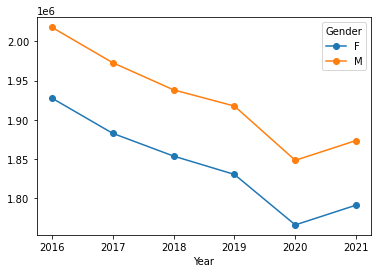

In [15]:
pivot_df.plot(kind='line', marker='o')